Endert Guerrero 

Módulo: 2

Asignatura: Introducción al Machine Learning

Docente Online: Freddy Hernan Sanchez Vallejos

# Librerias

Importare las librerías necesarias para realizar el modulo.

In [1]:
import pandas as pd

# Importación de los conjuntos de datos 

Importare los Dataset´s haciendo uso de pandas 

In [2]:
train = pd.read_excel("test.xlsx")
test = pd.read_excel("test.xlsx")

In [3]:
print(train.shape)
print(train.head(4))


(418, 11)
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3                  Wirz, Mr. Albert    male  27.0      0   

   Parch  Ticket     Fare Cabin Embarked  
0      0  330911  78292.0   NaN        Q  
1      0  363272      7.0   NaN        S  
2      0  240276  96875.0   NaN        Q  
3      0  315154  86625.0   NaN        S  


In [4]:
print(test.shape)
print(test.head(4))

(418, 11)
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   
3          895       3                  Wirz, Mr. Albert    male  27.0      0   

   Parch  Ticket     Fare Cabin Embarked  
0      0  330911  78292.0   NaN        Q  
1      0  363272      7.0   NaN        S  
2      0  240276  96875.0   NaN        Q  
3      0  315154  86625.0   NaN        S  


# Ítem 1

# Variables faltantes

Mostraremos en pantalla las variables faltantes de los Datasets

In [5]:
print(train.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Como podemos ver entre los datos faltantes tenemos 177 datos faltantes en "age", donde es una variable de tipo "int", también tenemos 687 datos nulos en cabin lo cual serian bastantes en relación con el tamaño de nuestro dataset (891).

In [6]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Por otro lado en nuestro data Test tenemos 86 datos faltantes en "Age" y 327 en "cabin".

# Ítem 2

# Imputación de datos

Ahora realizare la imputación de los datos faltantes requeridos según lo pedido en la actividad.

# Imputación de Age en Train

In [7]:
age_mean_train = train["Age"].mean()
train["Age"].fillna(age_mean_train, inplace = True)
train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Imputación de Age en Test

In [8]:
age_mean_test = test["Age"].mean()
test["Age"].fillna(age_mean_test, inplace = True)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Imputación de Cabin en Train

In [9]:
train["Cabin"].describe

<bound method NDFrame.describe of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object>

In [10]:
train['Cabin'].fillna('Sin Cabina', inplace=True)
train.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

## Imputación de Cabin en Test

In [11]:
test['Cabin'].fillna('Sin Cabina', inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

# Ítem 3
Por lo visto a partir de unicamente de la data Train y Test no se puede realizar el modelo de regresión logística que calcule el accurancy de los sobrevivientes del titanic, ya que desde mi punto de vista faltaría la columna survived para lograr esto, cosa que no tienen esta data.

In [12]:
df = pd.read_excel("titanic_M1.xlsx")

df["pclass"].fillna(2, inplace = True)
df["age"].fillna(df["age"].mean(), inplace = True)

sex_mapping = { 'Hombre': 'male', 'male': 'male', 'Mujer': 'female', 'female': 'female'}
df['sex'] = df['sex'].map(sex_mapping)

sex_mapping = {'male': 0,'female': 1}
df['sex'] = df['sex'].map(sex_mapping)

embarked_city = "S"
df["embarked"].fillna(embarked_city, inplace=True)

df['cabin'].fillna('Cxxx', inplace=True)

df['boat'].fillna(False, inplace=True)

df['body'].fillna(False, inplace=True)

df['home.dest'].fillna("New York", inplace=True)

df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,2113375.0,B5,S,2,False,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",0,0.916700,1,2,113781,1515500.0,C22 C26,S,11,False,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,1515500.0,C22 C26,S,False,False,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,1515500.0,C22 C26,S,False,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,1515500.0,C22 C26,S,False,False,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,3.0,0,"Smiljanic, Mr. Mile",0,30.026276,0,0,315037,86625.0,Cxxx,S,False,False,New York
1215,3.0,0,"Smith, Mr. Thomas",0,30.026276,0,0,384461,77500.0,Cxxx,Q,False,False,New York
1216,3.0,1,"Smyth, Miss. Julia",1,30.026276,0,0,335432,77333.0,Cxxx,Q,13,False,New York
1217,3.0,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",0,19.000000,0,0,348124,76500.0,F G73,S,False,False,New York


In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
features = ['pclass', 'age', 'sex', 'sibsp', 'parch']
x = df[features]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)  

y_pred 

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

Accuracy 0.8032786885245902


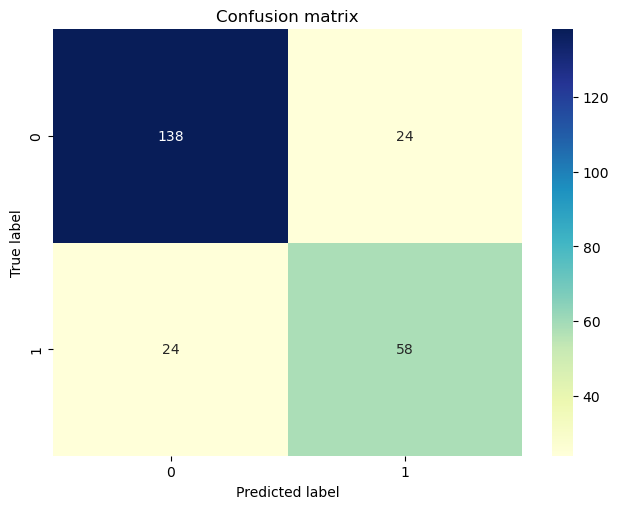

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)

class_names = ['0','1']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print('Accuracy', metrics.accuracy_score(y_test, y_pred))